# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
df = pd.read_csv("datasets/athlete_events.csv")

# Filtrer pour l'année 2016 et seulement les gagnants de médailles
df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notnull())]

# Trouver les 5 sports avec le plus de médailles
top_sports = df_2016['Sport'].value_counts().head(5).index.tolist()
df_top_sports = df_2016[df_2016['Sport'].isin(top_sports)]
print(df_2016)
print(df_top_sports)

            ID                             Name Sex   Age  Height  Weight  \
158         62                Giovanni Abagnale   M  21.0   198.0    90.0   
161         65                Patimat Abakarova   F  21.0   165.0    49.0   
175         73                        Luc Abalo   M  31.0   182.0    86.0   
450        250             Saeid Morad Abdevali   M  26.0   170.0    80.0   
794        455      Denis Mikhaylovich Ablyazin   M  24.0   161.0    62.0   
...        ...                              ...  ..   ...     ...     ...   
269511  134857                         Zhu Ting   F  21.0   198.0    78.0   
270111  135132                    Bojana ivkovi   F  28.0   186.0    72.0   
270281  135205  Shakhobiddin Shokirovich Zoirov   M  23.0   169.0    52.0   
270370  135245                     Milenko Zori   M  27.0   179.0    73.0   
271019  135525                   Martin Zwicker   M  29.0   175.0    64.0   

              Team  NOC        Games  Year  Season            City  \
158  

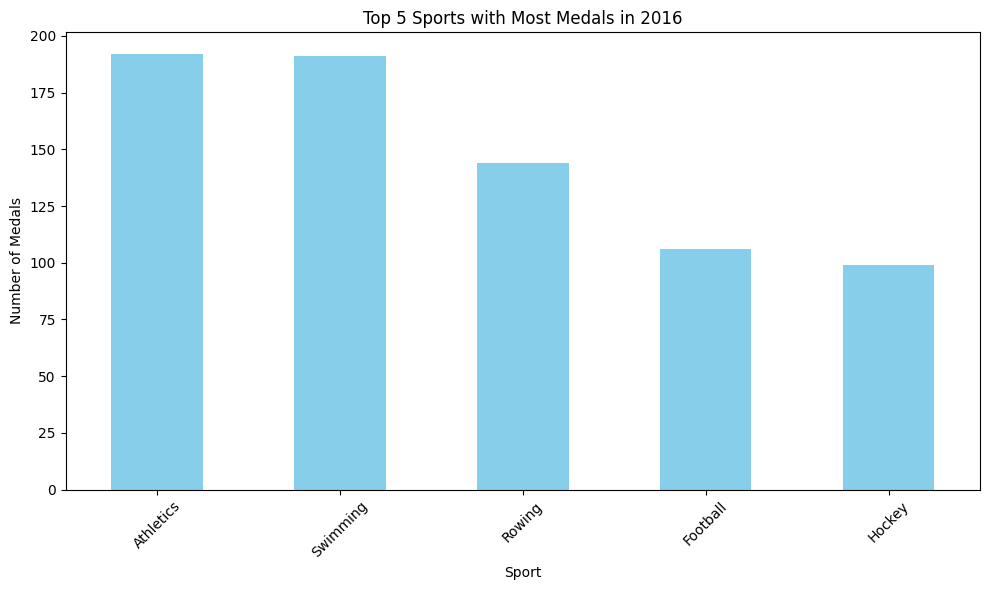

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
olympics = pd.read_csv("datasets/athlete_events.csv")

# Filtrer pour 2016 et les médaillés
olympics_2016 = olympics[(olympics['Year'] == 2016) & (olympics['Medal'].notnull())]

# Compter les médailles par sport
top5_sports = olympics_2016['Sport'].value_counts().head(5)

# Bar plot
plt.figure(figsize=(10, 6))
top5_sports.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sports with Most Medals in 2016')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


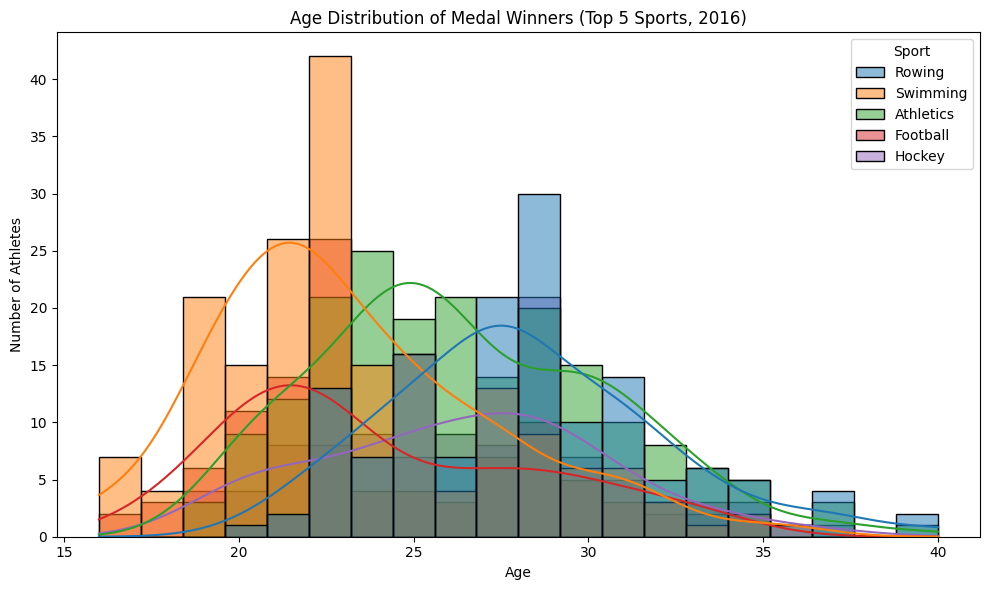

In [4]:
import seaborn as sns

# Filtrer pour top 5 sports
top_sport_names = top5_sports.index.tolist()
top5_df = olympics_2016[olympics_2016['Sport'].isin(top_sport_names)]

# Histogramme des âges
plt.figure(figsize=(10, 6))
sns.histplot(data=top5_df, x='Age', hue='Sport', bins=20, kde=True)
plt.title('Age Distribution of Medal Winners (Top 5 Sports, 2016)')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.tight_layout()
plt.show()


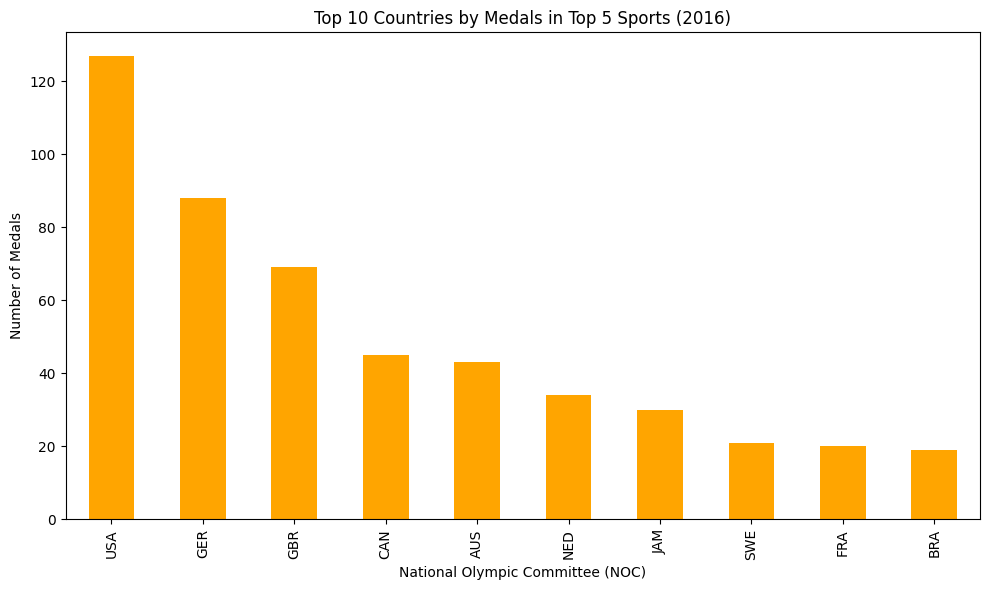

In [5]:
# Médailles par pays (NOC)
team_medals = top5_df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
team_medals.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Medals in Top 5 Sports (2016)')
plt.xlabel('National Olympic Committee (NOC)')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.show()


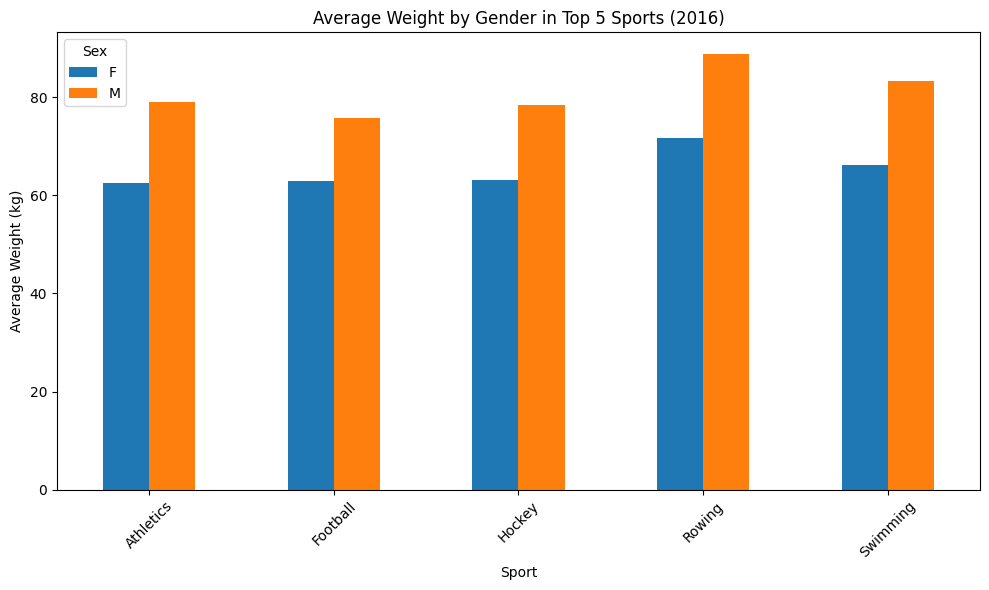

In [ ]:
# Moyenne de poids par sexe et par sport
avg_weight = top5_df.groupby(['Sex', 'Sport'])['Weight'].mean().unstack()

# Bar plot
avg_weight.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average Weight by Gender in Top 5 Sports (2016)')
plt.xlabel('Sport')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


